# 🌍 Tuberculosis Data Dashboard (1990–2013)
Interactive analytics to explore TB trends, regional patterns, and predictions for future health planning.


In [17]:
#  Load Libraries
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display, Markdown
from sklearn.linear_model import LinearRegression
import numpy as np


In [41]:
#  Load Dataset

df = pd.read_csv(r"C:\Users\13309\Desktop\TB_Burden_Country.csv")
# Load 2024 TB data
df_2024 = pd.read_csv(r"C:\Users\13309\Desktop\Tuberculosis_Trends.csv")

# Rename relevant columns
df = df.rename(columns={
    'Country or territory name': 'Country',
    'WHO region': 'Region',
    'Estimated number of incident cases (all forms)': 'Total_Cases',
    'Estimated incidence (all forms) per 100 000 population': 'Incidence_Rate',
    'Estimated total population number': 'Population'
})
df_2024 = df_2024.rename(columns={
    'TB_Cases': 'Total_Cases',
    'TB_Incidence_Rate': 'Incidence_Rate'
})


# Filter data by year
df = df[(df['Year'] >= 1990) & (df['Year'] <= 2013)]
df_2024['Year'] = 2024



In [42]:
# Cell 3: Interactive Widgets for Filtering
year_slider = widgets.IntSlider(value=2013, min=1990, max=2013, description='Year:')
region_selector = widgets.SelectMultiple(
    options=df['Region'].dropna().unique(),
    value=tuple(df['Region'].dropna().unique()),
    description='Region:'
)

def filter_data(year, regions):
    return df[(df['Year'] == year) & (df['Region'].isin(regions))]

display(year_slider, region_selector)


IntSlider(value=2013, description='Year:', max=2013, min=1990)

SelectMultiple(description='Region:', index=(0, 1, 2, 3, 4, 5), options=('EMR', 'EUR', 'AFR', 'WPR', 'AMR', 'S…

In [43]:
# Cell 4: Display KPIs
def display_kpis(year, regions):
    data = filter_data(year, regions)
    total_cases = int(data['Total_Cases'].sum())
    avg_rate = round(data['Incidence_Rate'].mean(), 2)
    display(Markdown(f"### 📌 KPIs for {year}"))
    display(Markdown(f"- **Total TB Cases**: {total_cases:,}"))
    display(Markdown(f"- **Average Incidence Rate per 100K**: {avg_rate}"))

display_kpis(year_slider.value, region_selector.value)


### 📌 KPIs for 2013

- **Total TB Cases**: 8,963,725

- **Average Incidence Rate per 100K**: 112.52

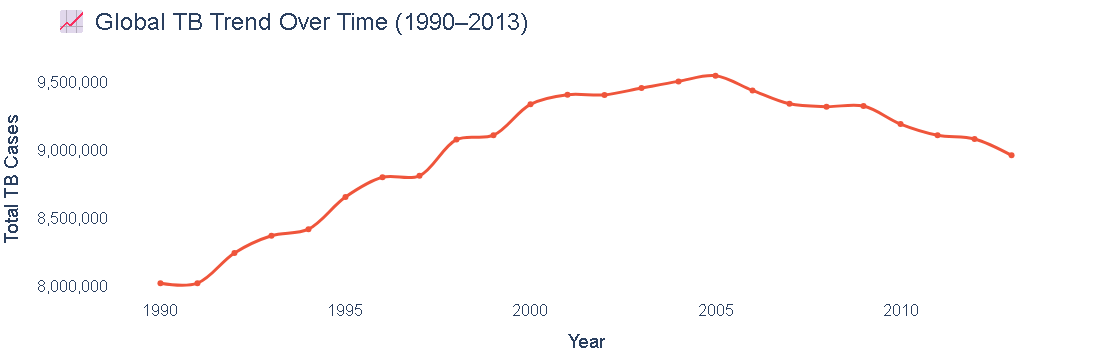

In [62]:
import plotly.express as px

# Filter and group the data by year
trend = df[df['Region'].isin(region_selector.value)]
trend_grouped = trend.groupby('Year')['Total_Cases'].sum().reset_index()

# Create a beautiful interactive line chart
fig1 = px.line(
    trend_grouped,
    x='Year',
    y='Total_Cases',
    title='📈 Global TB Trend Over Time (1990–2013)',
    markers=True,
    line_shape='spline',
    color_discrete_sequence=['#EF553B']  # Bold red-orange line
)

# Enhance trace and hover
fig1.update_traces(
    hovertemplate='<b>Year: %{x}</b><br>Total TB Cases: %{y:,}<extra></extra>',
    line=dict(width=3)
)

# Beautify layout
fig1.update_layout(
    title_font_size=24,
    xaxis_title='Year',
    yaxis_title='Total TB Cases',
    font=dict(size=16, family='Arial'),
    yaxis_tickformat=',',
    plot_bgcolor='rgba(255,255,255,0.95)',
    paper_bgcolor='rgba(255,255,255,0.95)',
    margin=dict(t=60, b=50, l=60, r=40),
    hoverlabel=dict(bgcolor="white", font_size=14, font_family="Arial")
)

fig1.show()


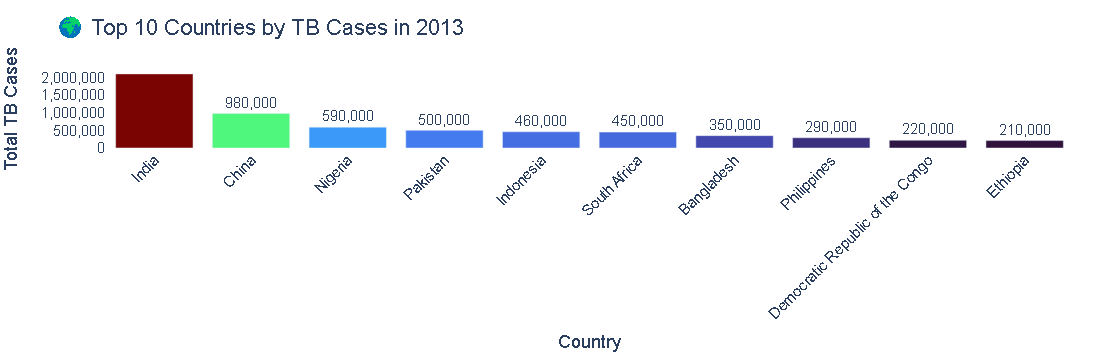

In [50]:

# Filter and sort top 10
top_countries = filter_data(year_slider.value, region_selector.value)
top_countries = top_countries.sort_values('Total_Cases', ascending=False).head(10)

# Enhanced interactive bar chart with better colors
fig2 = px.bar(
    top_countries,
    x='Country',
    y='Total_Cases',
    color='Total_Cases',
    text='Total_Cases',
    color_continuous_scale='Turbo',
    title=f"🌍 Top 10 Countries by TB Cases in {year_slider.value}",
    labels={'Total_Cases': 'Total TB Cases'}
)

fig2.update_traces(
    texttemplate='%{text:,}',  # format numbers with commas
    textposition='outside',
    hovertemplate='<b>%{x}</b><br>Total Cases: %{y:,}<extra></extra>'
)

fig2.update_layout(
    title_font_size=22,
    xaxis_tickangle=-45,
    xaxis_title='Country',
    yaxis_title='Total TB Cases',
    yaxis_tickformat=',',
    coloraxis_showscale=False,
    plot_bgcolor='white',
    paper_bgcolor='white',
    font=dict(size=15, family='Arial'),
    margin=dict(l=50, r=30, t=70, b=80)
)

fig2.show()


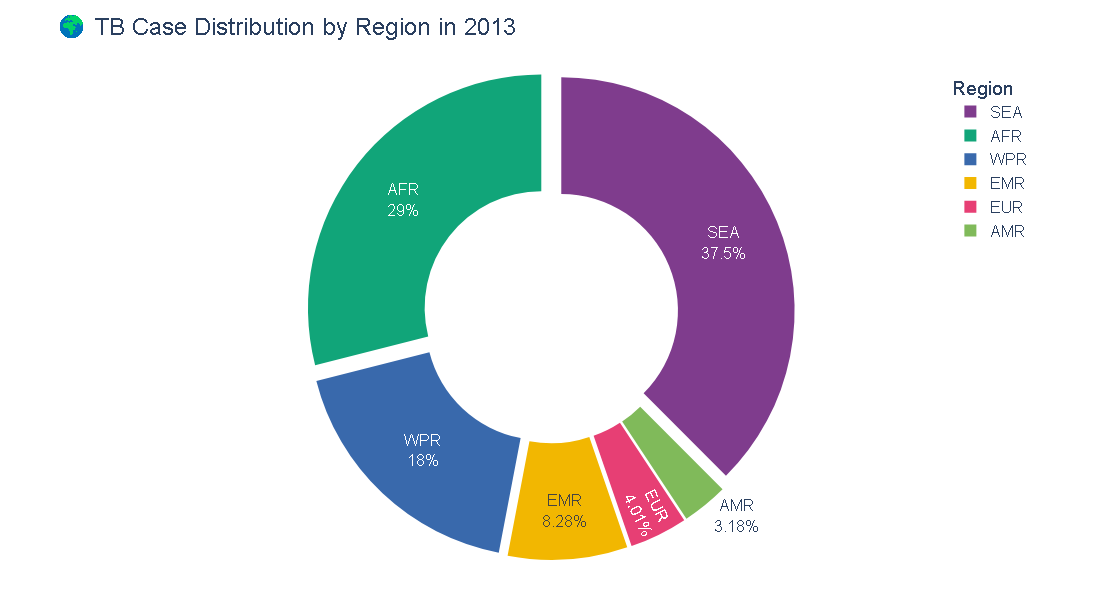

In [61]:

# Group and prepare data
region_dist = filter_data(year_slider.value, region_selector.value).groupby('Region')['Total_Cases'].sum().reset_index()

fig3 = px.pie(
    region_dist,
    names='Region',
    values='Total_Cases',
    title=f"🌍 TB Case Distribution by Region in {year_slider.value}",
    hole=0.5,  # Bigger donut hole
    color_discrete_sequence=px.colors.qualitative.Bold  # Bold color palette
)

fig3.update_traces(
    textinfo='percent+label',
    pull=[0.05] * len(region_dist),
    hovertemplate='<b>%{label}</b><br>Total Cases: %{value:,}<br>Share: %{percent}<extra></extra>'
)

fig3.update_layout(
    title_font_size=24,
    width=600,  # Increased width
    height=600,  # Increased height
    showlegend=True,
    legend_title_text='Region',
    font=dict(size=16, family='Arial'),
    plot_bgcolor='white',
    paper_bgcolor='white',
    margin=dict(t=70, b=40, l=40, r=40)
)

fig3.show()


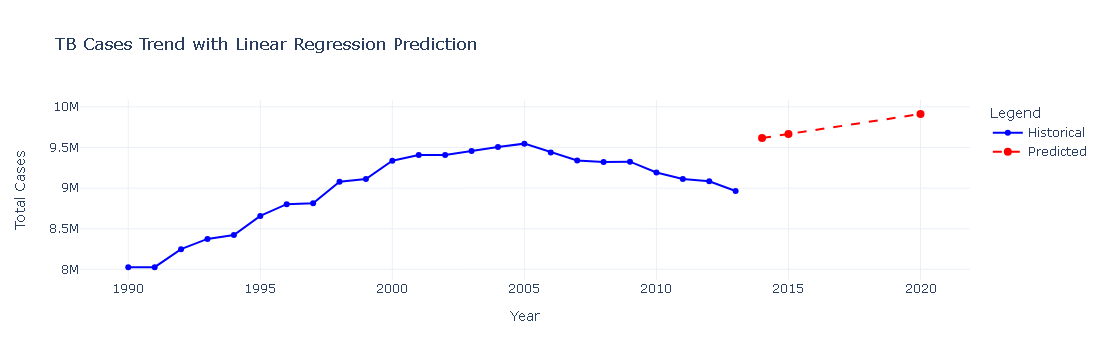

In [47]:

historical = df.groupby('Year')['Total_Cases'].sum().reset_index()
X = historical['Year'].values.reshape(-1, 1)
y = historical['Total_Cases'].values

# Train linear regression model
model = LinearRegression().fit(X, y)

# Predict future years
future_years = np.array([[2014], [2015], [2020]])
predictions = model.predict(future_years)

# Combine historical and prediction for plotting
future_df = pd.DataFrame({
    'Year': future_years.flatten(),
    'Total_Cases': predictions
})

# Plot with Plotly
fig = go.Figure()

# Historical trend
fig.add_trace(go.Scatter(
    x=historical['Year'], y=historical['Total_Cases'],
    mode='lines+markers',
    name='Historical',
    line=dict(color='blue')
))

# Predictions
fig.add_trace(go.Scatter(
    x=future_df['Year'], y=future_df['Total_Cases'],
    mode='markers+lines',
    name='Predicted',
    line=dict(dash='dash', color='red'),
    marker=dict(symbol='circle', size=8)
))

fig.update_layout(
    title="TB Cases Trend with Linear Regression Prediction",
    xaxis_title="Year",
    yaxis_title="Total Cases",
    legend_title="Legend",
    template="plotly_white"
)

fig.show()


## 🧾 TB Burden Dashboard Summary

**Past (1990–2013)**:  
Tuberculosis cases have fluctuated with some regional peaks. The total case count peaked in early 2000s.

**Present (2013)**:  
In 2013, the highest TB burden was observed in the African and South-East Asian regions.

**Future**:  
Basic linear regression shows a potential continued decline if global interventions persist.

_Recommendation_: Invest more in high-burden regions and maintain consistent health surveillance.


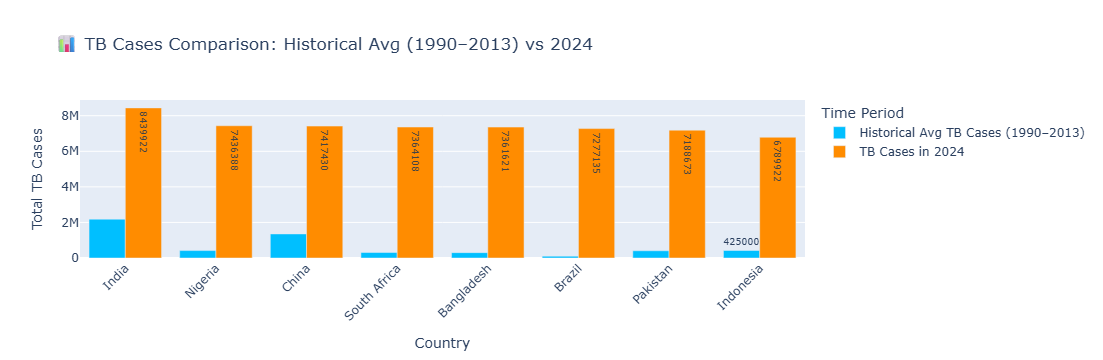

In [88]:
df_historical = df_combined[df_combined['Year'].between(1990, 2013)]
avg_historical = df_historical.groupby('Country')['Total_Cases'].mean().reset_index()
avg_historical.rename(columns={'Total_Cases': 'Historical Avg TB Cases (1990–2013)'}, inplace=True)

tb_2024_updated = pd.read_csv(r"C:\Users\13309\Desktop\Tuberculosis_Trends.csv")
possible_names = ['Total_Cases', 'TB_Cases', 'Cases']
found_col = next((col for col in possible_names if col in tb_2024_updated.columns), None)

if not found_col:
    raise ValueError("No valid TB cases column found. Please check your CSV for one of: Total_Cases, TB_Cases, or Cases.")

#  Clean and group 2024 data
tb_2024_updated = tb_2024_updated.groupby('Country')[found_col].sum().reset_index()
tb_2024_updated.rename(columns={found_col: 'TB Cases in 2024'}, inplace=True)

#  Merge historical and updated data
comparison_df = pd.merge(avg_historical, tb_2024_updated, on='Country')

#  Calculate % Change
comparison_df['% Change'] = ((comparison_df['TB Cases in 2024'] - comparison_df['Historical Avg TB Cases (1990–2013)']) /
                             comparison_df['Historical Avg TB Cases (1990–2013)']) * 100

#  Top 10 countries by 2024 cases
top10 = comparison_df.sort_values(by='TB Cases in 2024', ascending=False).head(10)

plot_data = top10.melt(
    id_vars=['Country', '% Change'],
    value_vars=['Historical Avg TB Cases (1990–2013)', 'TB Cases in 2024'],
    var_name='Time Period',
    value_name='Total TB Cases'
)

fig = px.bar(
    plot_data,
    x='Country',
    y='Total TB Cases',
    color='Time Period',
    barmode='group',
    text='Total TB Cases',
    color_discrete_map={
        'Historical Avg TB Cases (1990–2013)': 'deepskyblue',
        'TB Cases in 2024': 'darkorange'
    },
    title="📊 TB Cases Comparison: Historical Avg (1990–2013) vs 2024",
    labels={"Total TB Cases": "Total TB Cases", "Country": "Country"}
)

fig.update_traces(
    hovertemplate="<b>%{x}</b><br>Period: %{customdata[0]}<br>Cases: %{y:.0f}<br>% Change: %{customdata[1]:.2f}%",
    customdata=plot_data[['Time Period', '% Change']]
)

fig.update_layout(
    xaxis_tickangle=-45,
    yaxis=dict(showgrid=True),
    legend_title_text='Time Period',
    uniformtext_minsize=8,
    uniformtext_mode='hide'
)

fig.show()


# 🧪 TB Data Analysis: Historical (1990–2013) vs. Updated 2024

## 📌 Why Only 8 Countries Are Displayed Instead of 10?

Although the analysis was initially designed to display the **Top 10 countries** with the highest TB cases in 2024, only **8 countries** appear in the final output.

This happens because of a filtering condition that ensures only countries with available TB case data in **both** time periods — the **historical average (1990–2013)** and the **updated 2024** cases — are included. This is necessary to maintain accuracy in calculating the percentage changes.

```python
valid_countries = year_counts[year_counts == 2].index.tolist()
tolist()
tolist()
